데이터 분석의 성능을 향상시키기 위해서 혹은 해석의 편리성을 위해 이산형 변수를 범주형 변수로

변환하기도 한다

이를 변수 구간화라고 한다

예를 들어 나이 변수를 20대 30대 같은 특정 간격으로 나누거나

청소년(19세 이하), 청년(20~34), 중장년(34~54) 등 특정 의미 기준으로 나누는 방법이 있다

변숫값이 효과적으로 구간화됐는지는 IV값 등으로 측정할 수 있다

0 ~0.02 : 의미없음

0.02 ~ 0.1 : 약한 예측

0.1 ~ 0.3 : 중간 예측

0.3 ~ 0.5 : 강한 예측

0.5 ~ 1 : 과도한 예측 (확인 필요)

IV수치가 높을 수록 종속변수의 True와 False를 잘 구분할 수 있는 정보량이 많다는 뜻이다

따라서 변수가 종속변수를 제대로 잘 설명할 수 있도록 구간화가 잘되면 IV값이 높아진다

일반적으로 IV값이 0.3보다 큰 경우는 예측력이 우수한 변수인 것으로 판단한다

# 1. 패키지 설치

In [2]:
!pip install xverse

# 2. 패키지 임포트

In [3]:
from xverse.transformer import WOE
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 3. 데이터 불러오기 및 확인

In [4]:
df = pd.read_csv('/content/heart_2020_cleaned.csv')

df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 4. BMI 칼럼 분포 확인

In [5]:
df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

# 5. BMI 칼럼 분포 시각화

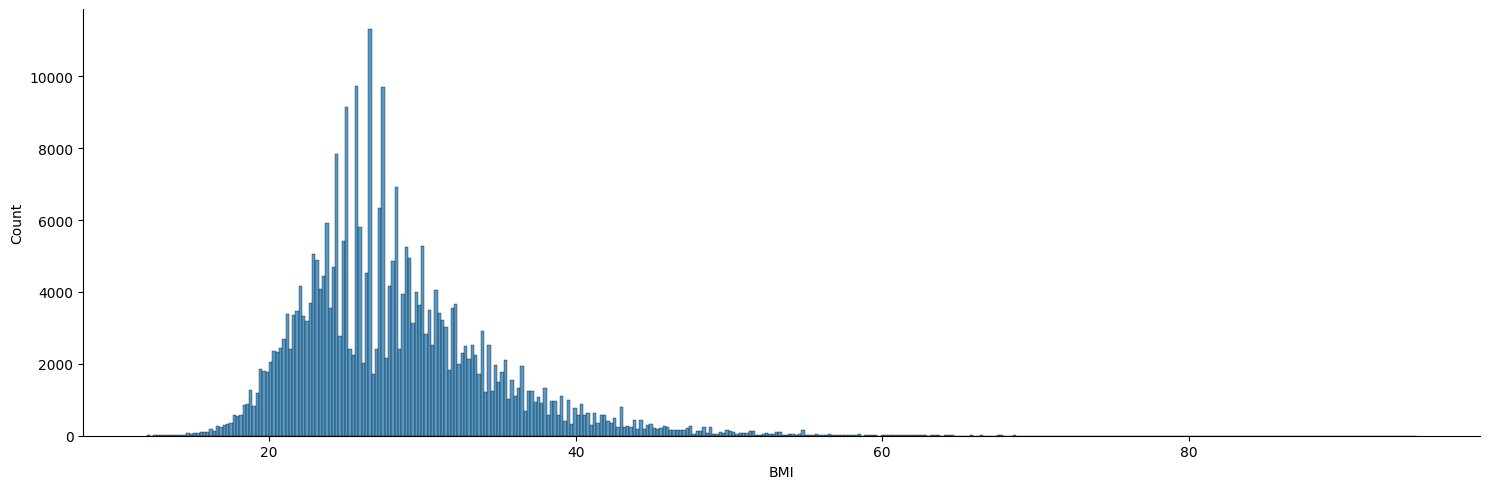

In [6]:
%matplotlib inline
sns.displot(df['BMI'], height = 5, aspect=3)

# height : 도표의 높이를 인치 단위로 설정
# aspect : 도표의 가로 길이는 세로 길이의 3배

60 이상부터는 관측치가 희소하다

# 6. 임의로 구간 기준 설정하여 구간화

In [7]:
# 데이터셋 복사
df1 = df.copy()

# 구간화용 빈 칼럼 생성 - 생략해도 되지만 바로 옆에 붙여 보기 위함
df1.insert(2, 'BMI_bin', 0)

df1.loc[df1['BMI'] <= 20, "BMI_bin"] = 'a'
df1.loc[(df1['BMI'] > 20) & (df1['BMI'] <= 30), "BMI_bin"] = 'b'
df1.loc[(df1['BMI'] > 30) & (df1['BMI'] <= 40), "BMI_bin"] = 'c'
df1.loc[(df1['BMI'] > 40) & (df1['BMI'] <= 50), "BMI_bin"] = 'd'
df1.loc[(df1['BMI'] > 50) & (df1['BMI'] <= 60), "BMI_bin"] = 'e'
df1.loc[(df1['BMI'] > 60) & (df1['BMI'] <= 70), "BMI_bin"] = 'f'
df1.loc[df1['BMI'] > 70, "BMI_bin"] = 'g'

df1.head()

,HeartDisease,BMI,BMI_bin,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,a,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,b,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,b,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,b,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,b,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 7. 칼럼 분포 시각화

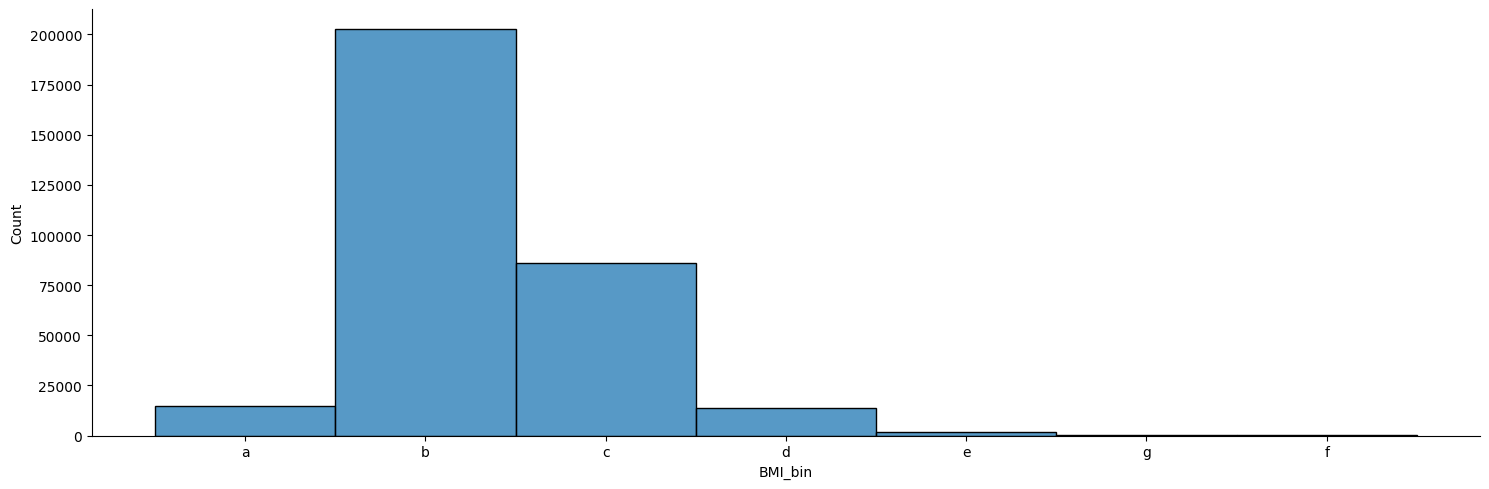

In [8]:
sns.displot(df1['BMI_bin'], height=5, aspect=3)

# 8. cut() 함수를 사용한 변수 구간화

In [9]:
# 구간화용 빈 칼럼 생성
df1.insert(3, 'BMI-bin2', 0)

df1['BMI_bin2'] = pd.cut(df1.BMI, bins =[0,20,30,40,50,60,70,95],
                                labels = ['a','b','c','d','e','f','g'] )

df1.head()

,HeartDisease,BMI,BMI_bin,BMI-bin2,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,...,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_bin2
0,No,16.60,a,0,Yes,No,No,3.0,30.0,No,...,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,a
1,No,20.34,b,0,No,No,Yes,0.0,0.0,No,...,80 or older,White,No,Yes,Very good,7.0,No,No,No,b
2,No,26.58,b,0,Yes,No,No,20.0,30.0,No,...,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,b
3,No,24.21,b,0,No,No,No,0.0,0.0,No,...,75-79,White,No,No,Good,6.0,No,No,Yes,b
4,No,23.71,b,0,No,No,No,28.0,0.0,Yes,...,40-44,White,No,Yes,Very good,8.0,No,No,No,b


# 9. 범주별 관측치 수 확인

In [10]:
df1.BMI_bin2.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin2,
b,202548
c,86198
a,14699
d,13839
e,2019
f,363
g,129


# 10. qcut() 함수를 사용한 변수 자동 구간화

In [11]:
df1.insert(4,'BMI_bin3', 0)

df1['BMI_bin3'] = pd.qcut(df1.BMI, q =7, labels =['a','b','c','d','e','f','g'])

df1.head()

,HeartDisease,BMI,BMI_bin,BMI-bin2,BMI_bin3,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,...,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,BMI_bin2
0,No,16.60,a,0,a,Yes,No,No,3.0,30.0,...,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,a
1,No,20.34,b,0,a,No,No,Yes,0.0,0.0,...,80 or older,White,No,Yes,Very good,7.0,No,No,No,b
2,No,26.58,b,0,d,Yes,No,No,20.0,30.0,...,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,b
3,No,24.21,b,0,b,No,No,No,0.0,0.0,...,75-79,White,No,No,Good,6.0,No,No,Yes,b
4,No,23.71,b,0,b,No,No,No,28.0,0.0,...,40-44,White,No,Yes,Very good,8.0,No,No,No,b


# 11. 범주별 관측치 수 확인

In [12]:
df1.BMI_bin3.value_counts().to_frame().style.background_gradient(cmap='winter')

,count
BMI_bin3,
b,47309
a,45980
d,45944
f,45805
g,45255
e,44977
c,44525


# 12. 칼럼 분포 시각화

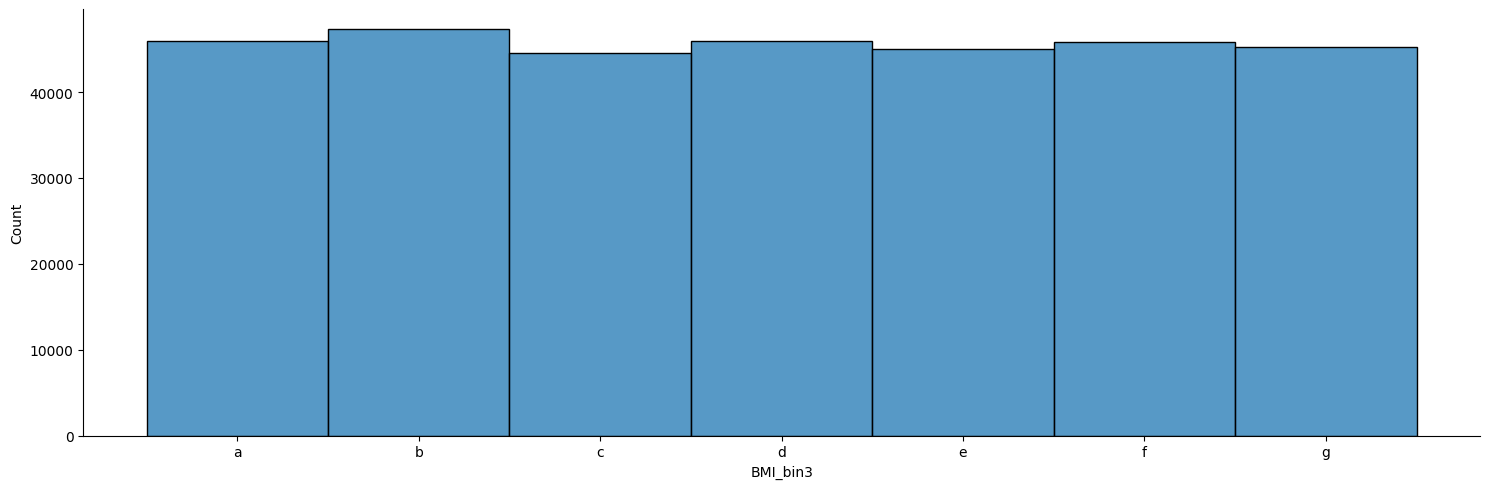

In [13]:
sns.displot(df1['BMI_bin3'], height = 5, aspect=3)

# 13. WOE를 활용한 변수 구간화(이거 쓰면 됨)

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
import pandas as pd
from xverse.transformer import WOE

# 데이터 복사
df2 = df.copy()

# xverse 함수 적용을 위한 더미변수 변환
df2 = pd.get_dummies(df)

# 구간화할 칼럼(x), 기준 칼럼(y) 지정
x = df2[['PhysicalHealth']]
y = df2['KidneyDisease_Yes']  # y를 Series로 변환

# 구간화
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
x_binned = est.fit_transform(x)


# 차원 축소 후 KBinsDiscretizer를 사용하여 구간화
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
x_binned = est.fit_transform(x)

# numpy.ndarray를 pandas DataFrame으로 변환
x_binned_df = pd.DataFrame(x_binned, columns=['PhysicalHealth_binned'])

# WOE 모델 설정 및 적용
clf = WOE()
clf.fit(x_binned_df, y)  # x_binned 대신 x_binned_df를 사용


a = clf.woe_df
b = clf.iv_df

a.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:216: FutureWarning: In version 1.3 onwards, subsample=2e5 will be used by default. Set subsample explicitly to silence this warning in the mean time. Set subsample=None to disable subsampling explicitly.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_discretization.py:279: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are remo

,Variable_Name,Category,Count,Event,Non_Event,Event_Rate,Non_Event_Rate,Event_Distribution,Non_Event_Distribution,WOE,Information_Value
0,PhysicalHealth_binned,0.0,251958,6258,245700,0.024837,0.975163,0.531284,0.797686,-0.406417,0.332094
1,PhysicalHealth_binned,1.0,67837,5521,62316,0.081386,0.918614,0.468716,0.202314,0.840174,0.332094


# 14. WOE를 활용한 구간화 변수의 IV 확인

In [16]:
b.head()

,Variable_Name,Information_Value
0,PhysicalHealth_binned,0.332094


IV값은 0.33